# Gene OU example

In [1]:
from reframed.io.sbml import load_cbmodel
model = load_cbmodel('models/iJO1366SL.xml', flavor='cobra')


In [2]:
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.optimization.problem import GOUProblem
from mewpy.simulation import SimulationMethod

In [3]:
BIOMASS_ID = 'R_Ec_biomass_iJO1366_core_53p95M'
O2 = 'R_EX_o2_LPAREN_e_RPAREN_'
GLC = 'R_EX_glc_LPAREN_e_RPAREN_'
PRODUCT_ID = 'R_EX_phe_DASH_L_LPAREN_e_RPAREN_'
model.set_objective({BIOMASS_ID:1})

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA )
evaluator_2 = WYIELD(BIOMASS_ID,PRODUCT_ID)

In [4]:
problem = GOUProblem(model,[evaluator_1,evaluator_2])

2020-03-05 12:50:29,583	WARNING services.py:586 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-03-05 12:50:29,584	INFO resource_spec.py:212 -- Starting Ray with 10.06 GiB memory available for workers and up to 5.03 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-03-05 12:50:29,903	INFO services.py:1078 -- View the Ray dashboard at localhost:8266


Creating 6 workers.


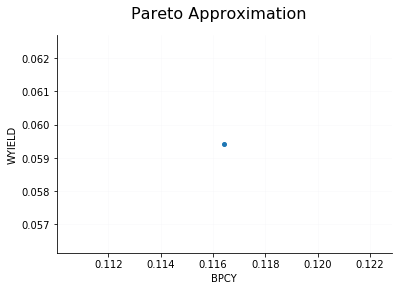

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.116426  0.000000  0.003810  0.015152|  0.000000  0.059415  0.005570  0.005489  0.005660|
   1    200|  0.000000  0.117522  0.000000  0.008818  0.025229|  0.004359  0.059415  0.005570  0.007700  0.010558|
   2    300|  0.000000  0.360785  0.000291  0.025107  0.055566|  0.004359  1.382775  0.005571  0.026375  0.137546|
   3    400|  0.000000  0.365496  0.025019  0.049472  0.069081|  0.004359  1.382775  0.005751  0.034486  0.137636|
   4    500|  0.000000  0.365496  0.116152  0.109014  0.087770|  0.004478  1.382775  0.059415  0.055139  0.135748|
   5    600|  0.000000  0.365496  0.142458  0.188589  0.090259|  0.030668  1.382775  0.059415  0.073045  0.131796|
   6    700|  0.000000  0.365496  0.244052  0.271593  0.065099|  0.030668  1.382775  0.059503  0.075752  0.131532|
   7    800|  0.000000  0.365496  0.360785  0.324952  0.061325|  0.052470  1.382

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from mewpy.optimization.ea import EA
ea = EA(problem, max_generations= 10, mp = True, visualizer = True)
final_pop = ea.run()